In [ ]:
!git clone https://github.com/HasnainRaz/SemSegPipeline

fatal: destination path 'SemSegPipeline' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/tensorflow/examples.git

Cloning into 'examples'...
remote: Enumerating objects: 23802, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 23802 (delta 10), reused 52 (delta 1), pack-reused 23730 (from 1)
Receiving objects: 100% (23802/23802), 44.10 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (12949/12949), done.


In [ ]:
!wget https://scholar.cu.edu.eg/Dataset_BUSI.zip

--2024-09-19 13:35:59--  https://scholar.cu.edu.eg/Dataset_BUSI.zip
Resolving scholar.cu.edu.eg (scholar.cu.edu.eg)... 195.246.42.194
Connecting to scholar.cu.edu.eg (scholar.cu.edu.eg)|195.246.42.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205873341 (196M) [application/zip]
Saving to: ‘Dataset_BUSI.zip’

Dataset_BUSI.zip    100%[===================>] 196.34M   323KB/s    in 10m 29s 

2024-09-19 13:46:30 (320 KB/s) - ‘Dataset_BUSI.zip’ saved [205873341/205873341]



In [ ]:
#!rm -r Dataset_BUSI_with_GT/

In [ ]:
!unzip Dataset_BUSI.zip

Archive:  Dataset_BUSI.zip
   creating: Dataset_BUSI_with_GT/
   creating: Dataset_BUSI_with_GT/benign/
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import os
import pandas as pd

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
from SemSegPipeline.dataloader import DataLoader
import shutil

In [ ]:
from examples.tensorflow_examples.models.pix2pix import pix2pix

In [ ]:
masks = []
images = []

for dir in os.listdir("Dataset_BUSI_with_GT/"):
  path = f"Dataset_BUSI_with_GT/{dir}/"
  for file_name in os.listdir(path):
    if "mask" in file_name :
      masks.append(path+file_name)
    else:
      images.append(path+file_name)
masks = sorted(masks)
images = sorted(images)

In [ ]:
masks[:5]

['Dataset_BUSI_with_GT/benign/benign (1)_mask.png',
 'Dataset_BUSI_with_GT/benign/benign (10)_mask.png',
 'Dataset_BUSI_with_GT/benign/benign (100)_mask.png',
 'Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png',
 'Dataset_BUSI_with_GT/benign/benign (101)_mask.png']

In [ ]:
repeted = pd.Series(masks).apply(lambda x: x.split("mask")[0]).value_counts().apply(lambda x : x if x>1 else None).dropna().index.to_list()

In [ ]:
repeted_file = []
for file in masks:
  for rep in repeted:
    if rep in file:
      repeted_file.append(file)

In [ ]:
res = []
don = []
for f in repeted_file:
  temp = []
  for l in repeted_file:
    if f.split("mask")[0] == l.split("mask")[0] and l not in don:
        temp.append(l)
        don.append(l)
  if len(temp)>0:
    res.append(temp)
print(res)


[['Dataset_BUSI_with_GT/benign/benign (100)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png'], ['Dataset_BUSI_with_GT/benign/benign (163)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (163)_mask_1.png'], ['Dataset_BUSI_with_GT/benign/benign (173)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (173)_mask_1.png'], ['Dataset_BUSI_with_GT/benign/benign (181)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (181)_mask_1.png'], ['Dataset_BUSI_with_GT/benign/benign (195)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (195)_mask_1.png', 'Dataset_BUSI_with_GT/benign/benign (195)_mask_2.png'], ['Dataset_BUSI_with_GT/benign/benign (25)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (25)_mask_1.png'], ['Dataset_BUSI_with_GT/benign/benign (315)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (315)_mask_1.png'], ['Dataset_BUSI_with_GT/benign/benign (346)_mask.png', 'Dataset_BUSI_with_GT/benign/benign (346)_mask_1.png'], ['Dataset_BUSI_with_GT/benign/benign (4)_mask.png', 'Dataset_BUSI_

In [ ]:
for imgs in res :
  result_image = cv2.imread(imgs[0], cv2.IMREAD_GRAYSCALE)
  for img in imgs[1:]:
    result_image+=cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    print(img)
    masks.remove(img)
  cv2.imwrite(imgs[0],result_image)

Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (163)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (173)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (181)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (195)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (195)_mask_2.png
Dataset_BUSI_with_GT/benign/benign (25)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (315)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (346)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (4)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (424)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (54)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (58)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (83)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (92)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (93)_mask_1.png
Dataset_BUSI_with_GT/benign/benign (98)_mask_1.png
Dataset_BUSI_with_GT/malignant/malignant (53)_mask_1.png


In [ ]:
images[:5]

['Dataset_BUSI_with_GT/benign/benign (1).png',
 'Dataset_BUSI_with_GT/benign/benign (10).png',
 'Dataset_BUSI_with_GT/benign/benign (100).png',
 'Dataset_BUSI_with_GT/benign/benign (101).png',
 'Dataset_BUSI_with_GT/benign/benign (102).png']

In [ ]:
!mkdir images maskes

In [ ]:
for i in range(len(masks)):
  shutil.move(masks[i],f"maskes/{masks[i].split('/')[-1]}")
  shutil.move(images[i],f"images/{images[i].split('/')[-1]}")

#Instead of using Dataloader function build dataloader your self

In [ ]:
IMAGE_DIR_PATH = 'images'
MASK_DIR_PATH = 'maskes'
BATCH_SIZE = 32

# create list of PATHS
images_paths = sorted([os.path.join(IMAGE_DIR_PATH, x) for x in os.listdir(IMAGE_DIR_PATH) ])
masks_paths = sorted([os.path.join(MASK_DIR_PATH, x) for x in os.listdir(MASK_DIR_PATH) ])

In [ ]:
print(images_paths[:5])
print(masks_paths[:5])

['images/benign (1).png', 'images/benign (10).png', 'images/benign (100).png', 'images/benign (101).png', 'images/benign (102).png']
['maskes/benign (1)_mask.png', 'maskes/benign (10)_mask.png', 'maskes/benign (100)_mask.png', 'maskes/benign (101)_mask.png', 'maskes/benign (102)_mask.png']


In [ ]:
def load_image(paths,mask=False):
  images = []
  for path in paths:
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    if mask:
      img = np.where(np.all(img == [0, 0, 0], axis=-1), 0, 1)
    images.append(img)
  return np.array(images)

In [ ]:
images_arrays = load_image(images_paths)
masks_arrays = load_image(masks_paths,mask=True)

In [ ]:
from sklearn.model_selection import train_test_split

train_images,test_images,train_masks,test_masks = train_test_split(images_arrays,masks_arrays,test_size=0.1,random_state=42)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_masks)).batch(32).shuffle(20)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_masks)).batch(32)

(32, 224, 224, 3)
(224, 224)


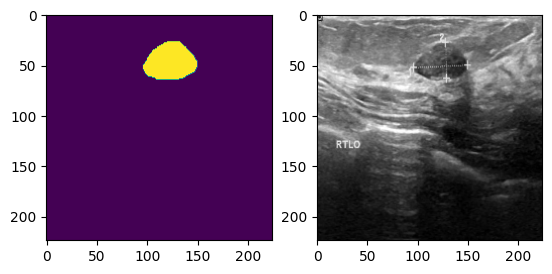

In [ ]:
for image, mask in train_dataset.take(2):
  plt.subplot(1,2,1)
  plt.imshow(mask[2])
  plt.subplot(1,2,2)
  plt.imshow(image[2].numpy().astype(np.uint8))
  print(image.shape)
  print(mask[2].shape)
  break

Visualize an image example and its corresponding mask from the dataset:

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = True

# Define the up_stack layers
up_stack = [
    pix2pix.upsample(576, 3),  # 4x4 -> 8x8 (matching skip layer 3)
    pix2pix.upsample(192, 3),  # 8x8 -> 16x16 (matching skip layer 2)
    pix2pix.upsample(144, 3),  # 16x16 -> 32x32 (matching skip layer 1)
    pix2pix.upsample(96, 3),   # 32x32 -> 64x64 (matching skip layer 0)
]

# Define the UNet model
def unet_model(output_channels: int):
    inputs = tf.keras.layers.Input(shape=(224, 224, 3))

    # Normalize the inputs to [0, 1]
    normalized_inputs = tf.keras.layers.Rescaling(1./255)(inputs)

    # Downsampling with MobileNetV2
    skips = down_stack(normalized_inputs)

    # Debug output shapes of skips
    for i, skip in enumerate(skips):
        print(f"Skip layer {i} shape: {skip.shape}")

    # Start with the bottleneck layer (last layer of the downsampled features)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsample and apply skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    # Upsample to match the original input shape (224x224)
    last = tf.keras.layers.Conv2DTranspose(
        filters=output_channels, kernel_size=3, strides=2,
        padding='same',activation='sigmoid')  # 112x112 -> 224x224
    x = last(x)

    # The output shape should be (224, 224, output_channels)
    return tf.keras.Model(inputs=inputs, outputs=x)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Train the model

Now, all that is left to do is to compile and train the model.

Since this is a multiclass classification problem, use the `tf.keras.losses.SparseCategoricalCrossentropy` loss function with the `from_logits` argument set to `True`, since the labels are scalar integers instead of vectors of scores for each pixel of every class.

When running inference, the label assigned to the pixel is the channel with the highest value. This is what the `create_mask` function is doing.

In [ ]:
model = unet_model(output_channels=1)
model.compile(optimizer="adam",
              loss="dice",
              metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])

Skip layer 0 shape: (None, 112, 112, 96)
Skip layer 1 shape: (None, 56, 56, 144)
Skip layer 2 shape: (None, 28, 28, 192)
Skip layer 3 shape: (None, 14, 14, 576)
Skip layer 4 shape: (None, 7, 7, 320)


Plot the resulting model architecture:

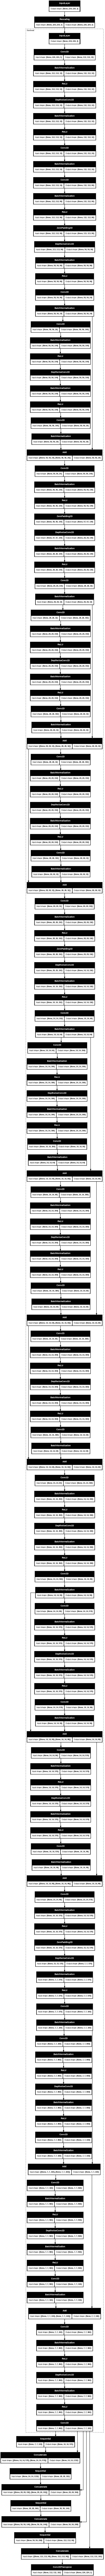

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, dpi=64)

Try out the model to check what it predicts before training:

In [ ]:
sample_image = next(iter(train_dataset.take(1)))[0][0]
sample_mask = next(iter(train_dataset.take(1)))[1][0]

In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_masks = model.predict(image)
      pred_mask = (pred_masks[0]>0.5).astype(np.uint8)
      display([image[0], mask[0], pred_mask])
  else:
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = (pred_mask>0.5).astype(np.uint8)
    display([(sample_image).numpy().astype(np.uint8), sample_mask,pred_mask[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


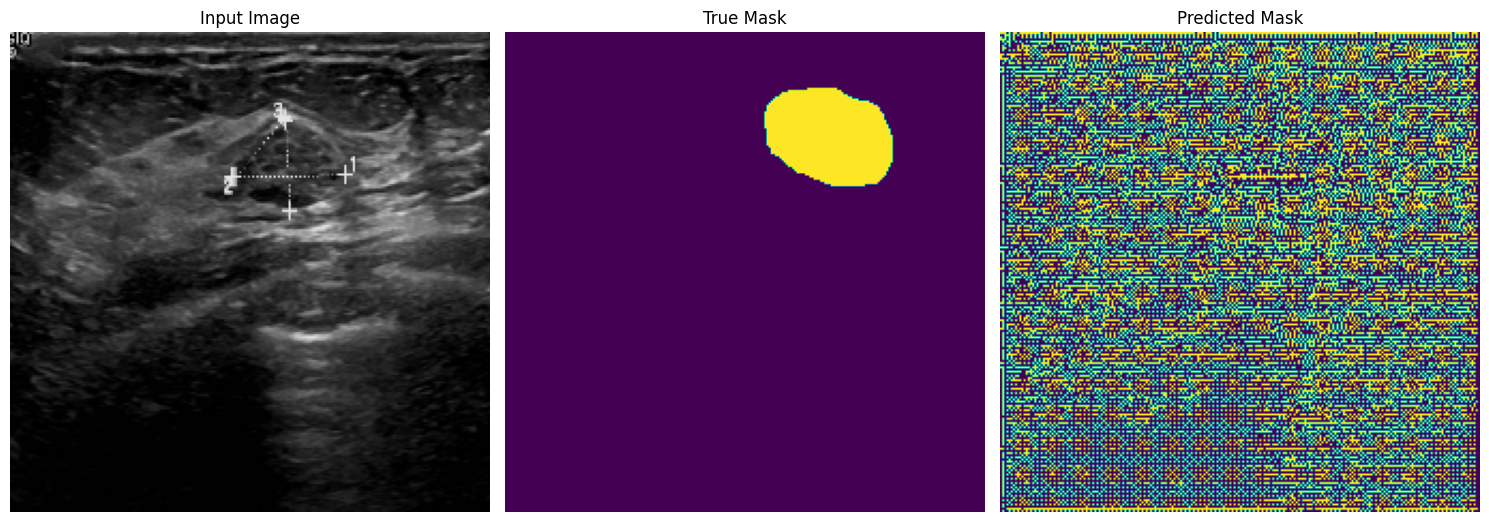

In [ ]:
show_predictions()

The callback defined below is used to observe how the model improves while it is training:

In [ ]:
checkpoint_filepath = "./checkpoint.model.keras"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_mean_io_u',
    mode='max',
    save_best_only=True)

In [ ]:
def compress_image(img_ar, filename):
    file = open(filename,"w")
    W, H = img_ar.shape
    bits=0
    for row in img_ar:
        l = run_length_encode(row) + '\n'
        bits+=len(l)
        file.write(l)
    file.close()
    orig_bits = W*H*8

In [ ]:
EPOCHS = 136
model_history = model.fit(train_dataset, epochs=EPOCHS,validation_data=test_dataset,callbacks=[model_checkpoint_callback])

Epoch 1/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - loss: 0.7673 - mean_io_u: 0.4506 - val_loss: 0.5887 - val_mean_io_u: 0.6086
Epoch 2/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - loss: 0.2781 - mean_io_u: 0.4638 - val_loss: 0.5473 - val_mean_io_u: 0.6136
Epoch 3/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - loss: 0.1915 - mean_io_u: 0.5132 - val_loss: 0.6431 - val_mean_io_u: 0.5938
Epoch 4/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - loss: 0.1413 - mean_io_u: 0.5385 - val_loss: 0.4832 - val_mean_io_u: 0.6282
Epoch 5/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - loss: 0.1356 - mean_io_u: 0.5666 - val_loss: 0.7342 - val_mean_io_u: 0.5089
Epoch 6/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - loss: 0.1114 - mean_io_u: 0.5842 - val_loss: 0.7547 - val_mean_io_u: 0.4997
Epoch 7/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - loss: 0.0955 - mean_io_u: 0.6206 - val_loss: 0.7011 - val_mean_io_u: 0.4996
Epoch 8/136
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - loss: 0.0858 - mean_io_u: 

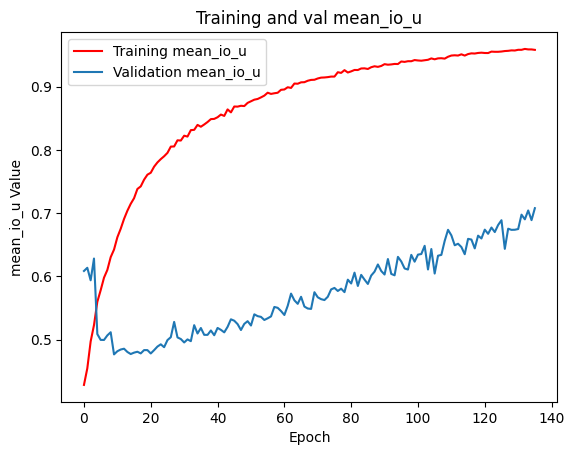

In [ ]:
mean_io_u = model_history.history['mean_io_u']
val_mean_io_u = model_history.history['val_mean_io_u']

plt.figure()
plt.plot(model_history.epoch, mean_io_u, 'r', label='Training mean_io_u')
plt.plot(model_history.epoch, val_mean_io_u, label='Validation mean_io_u')
plt.title('Training and val mean_io_u')
plt.xlabel('Epoch')
plt.ylabel('mean_io_u Value')
plt.legend()
plt.show()

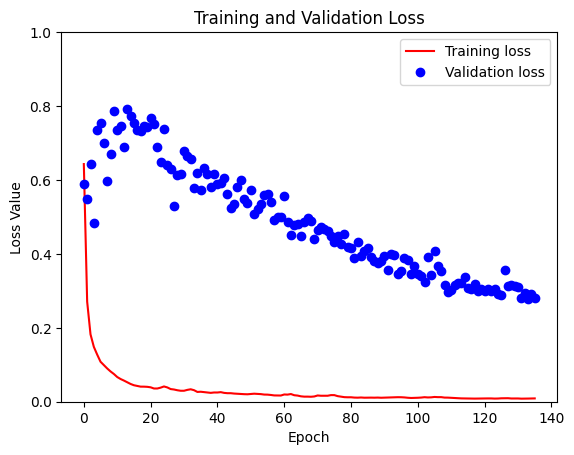

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

## Make predictions

Now, make some predictions. In the interest of saving time, the number of epochs was kept small, but you may set this higher to achieve more accurate results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


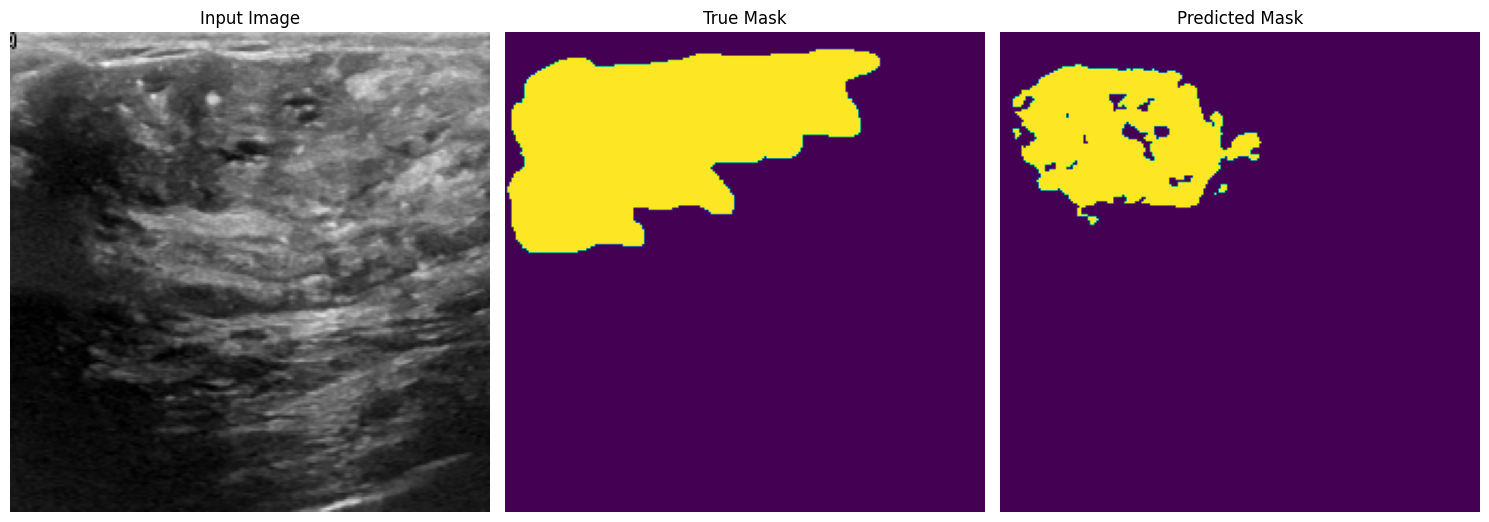

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


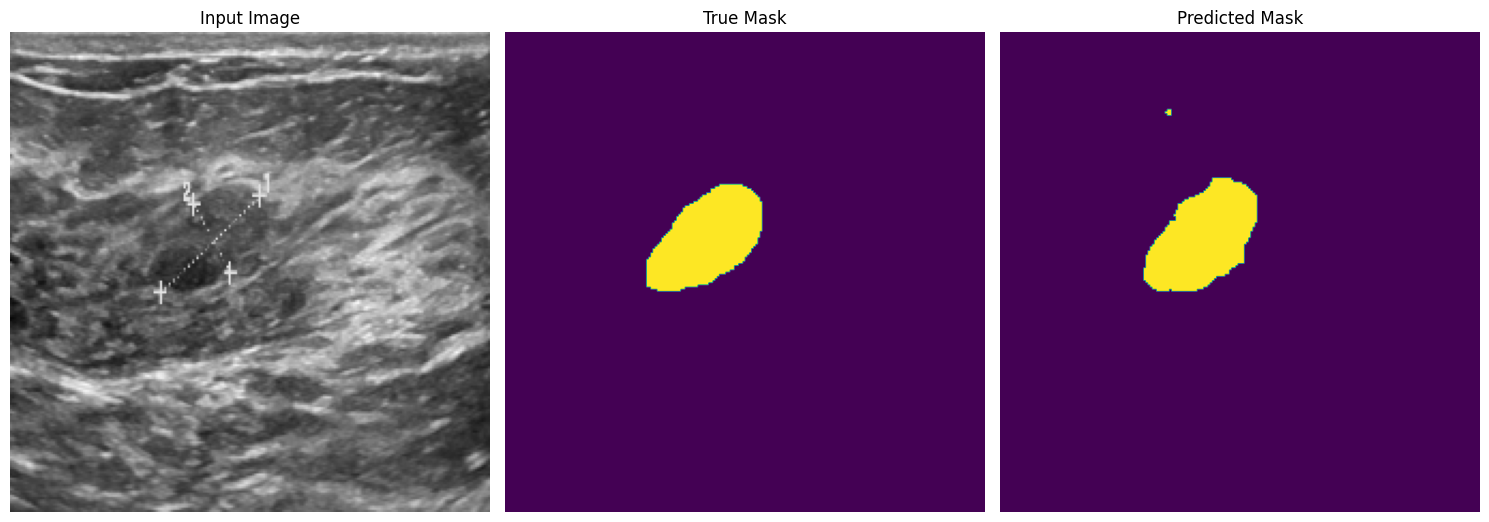

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


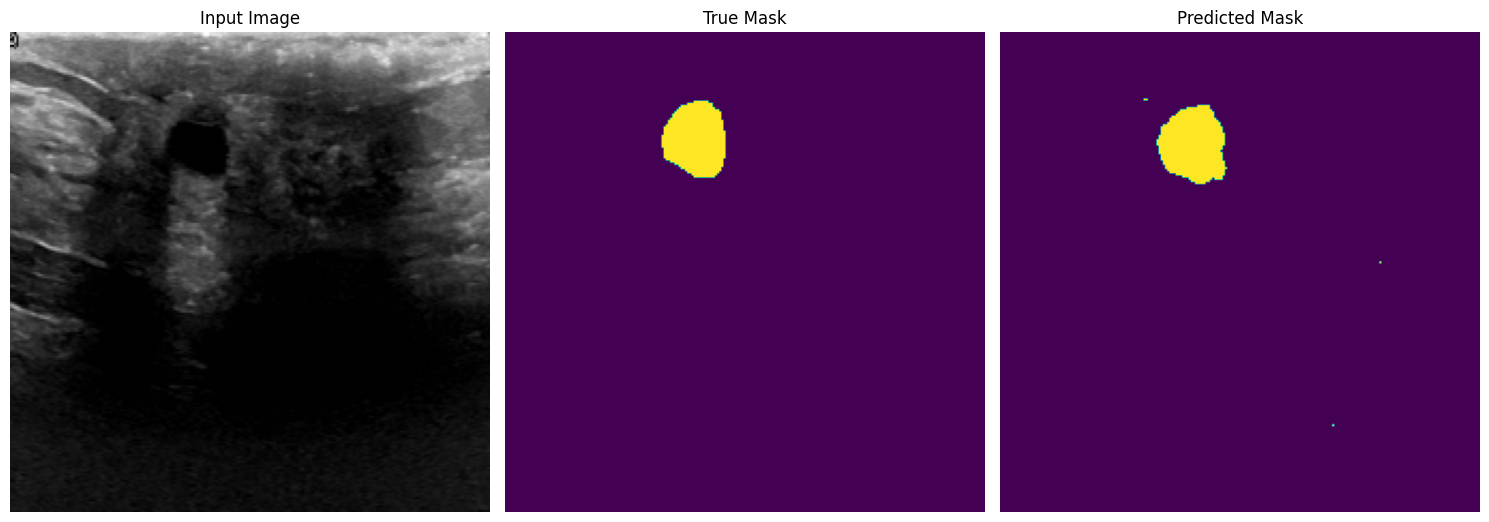

In [ ]:
show_predictions(test_dataset, 5)